In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 행정구역 GeoPandas DataFrame 로드

In [2]:
sig_gdf = gpd.read_file("sig_20230729/sig.shp", encoding='euc-kr')
sig_gdf.geometry = sig_gdf.geometry.set_crs('EPSG:5179')
sig_gdf.geometry = sig_gdf.geometry.to_crs('EPSG:4326')

sig_gdf

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((127.81765 38.28798, 127.81962 38.287..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((128.03050 38.29128, 128.03055 ..."
247,51810,Inje-gun,인제군,"POLYGON ((127.97751 37.95707, 127.97872 37.957..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((128.54881 38.30195, 128.54881 ..."


In [3]:
emd_gdf = gpd.read_file("emd_20230729/emd.shp", encoding='euc-kr')
emd_gdf.geometry = emd_gdf.geometry.set_crs('EPSG:5179')
emd_gdf.geometry = emd_gdf.geometry.to_crs('EPSG:4326')

emd_gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
...,...,...,...,...
5060,51830310,Seo-myeon,서면,"POLYGON ((128.40425 38.09607, 128.40504 38.096..."
5061,51830320,Sonyang-myeon,손양면,"MULTIPOLYGON (((128.67444 38.08345, 128.67444 ..."
5062,51830330,Hyeonbuk-myeon,현북면,"MULTIPOLYGON (((128.73582 38.01976, 128.73582 ..."
5063,51830340,Hyeonnam-myeon,현남면,"MULTIPOLYGON (((128.80236 37.92274, 128.80333 ..."


# 산불통계데이터

In [19]:
df = pd.read_csv('산불데이터에코드매핑.csv')
df

,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,...,발생원인_기타,피해면적_합계,발생장소_읍면동,발생장소_시도_시군구,발생장소_시도_시군구_읍면동,CTPRVN_CD,SIG_CD,EMD_CD,매핑수준,매핑방법
0,2024,9,29,15:41,일,2024,9,30,16:30,전북,...,산업현장실화,0.31,산동,전북 남원,전북 남원 산동,45,45190.0,45190410.0,완전 매칭,"시도,시군구,읍면동"
1,2024,9,10,15:55,화,2024,9,10,18:00,경남,...,성묘객실화(벌집소각),0.10,내이,경남 밀양,경남 밀양 내이,48,48270.0,48270102.0,완전 매칭,"시도,시군구,읍면동"
2,2024,9,10,14:35,화,2024,9,10,17:52,충남,...,원인미상,0.03,규암,충남 부여,충남 부여 규암,44,44760.0,44760310.0,완전 매칭,"시도,시군구,읍면동"
3,2024,9,10,14:24,화,2024,9,10,22:00,경북,...,조사중,1.00,화동,경북 상주,경북 상주 화동,47,47250.0,47250400.0,완전 매칭,"시도,시군구,읍면동"
4,2024,9,5,13:51,목,2024,9,5,16:10,경북,...,농산폐기물소각,0.05,녹전,경북 안동,경북 안동 녹전,47,47170.0,47170430.0,완전 매칭,"시도,시군구,읍면동"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,2022,1,3,12:36,월,2022,1,3,15:35,대구,...,화목난로비화,0.08,옥포,대구 달성,대구 달성 옥포,27,27710.0,27710262.0,완전 매칭,"시도,시군구,읍면동"
1566,2022,1,3,12:02,월,2022,1,3,14:56,강원,...,화목보일러재투기,0.80,남,강원 인제,강원 인제 남,51,51810.0,51810310.0,완전 매칭,"시도,시군구,읍면동"
1567,2022,1,2,14:29,일,2022,1,2,16:50,전남,...,담뱃불실화,0.10,조성,전남 보성,전남 보성 조성,46,46780.0,46780370.0,완전 매칭,"시도,시군구,읍면동"
1568,2022,1,2,08:18,일,2022,1,2,12:50,경북,...,축사전기누전,0.20,부계,대구 군위,대구 군위 부계,27,27720.0,27720330.0,완전 매칭,"시도,시군구,읍면동"


## 읍·면·동 코드 형식 변환

In [20]:
df['SIG_CD'] = df['SIG_CD'].apply(lambda x: f'{x:.0f}')
df['EMD_CD'] = df['EMD_CD'].apply(lambda x: f'{x:.0f}')

In [37]:
df = df[(df['SIG_CD'] != "nan") & (df['EMD_CD'] != "nan")]

# 시군구 대표점 추출

대표점은 GeoPandas Geometry의 근사된 중심점으로, 항상 Geometery 내 존재함이 보장된다.

In [22]:
sig_rep_pts = dict(zip(sig_gdf['SIG_CD'], sig_gdf.geometry.apply(lambda x: x.representative_point())))
emd_rep_pts = dict(zip(emd_gdf['EMD_CD'], emd_gdf.geometry.apply(lambda x: x.representative_point())))

In [38]:
df['REP_COORD'] = df['EMD_CD'].map(emd_rep_pts)
df.loc[df['REP_COORD'].isna(), 'REP_COORD'] =  df.loc[df['REP_COORD'].isna(), 'SIG_CD'].map(sig_rep_pts)

/var/folders/xv/0hny2vys32s2wxvrfgcj8wlw0000gn/T/ipykernel_1831/3845957931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REP_COORD'] = df['EMD_CD'].map(emd_rep_pts)


In [40]:
assert df['REP_COORD'].isna().sum() == 0

# 시각화

In [41]:
fire = list(zip(df['REP_COORD'], np.sqrt(df['피해면적_합계']))) # [(representation coordinate, radius), ...]

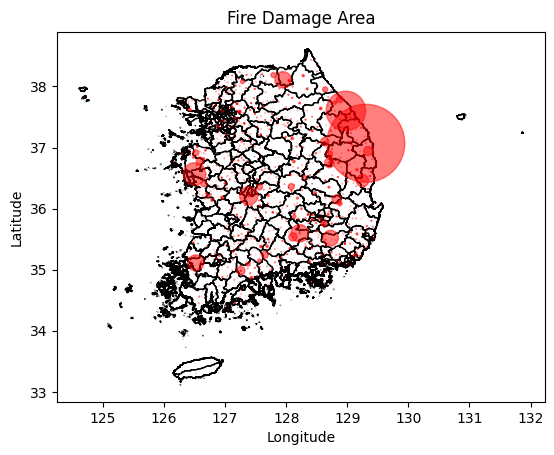

In [42]:
fig, ax = plt.subplots()

# Plot the base map
sig_gdf.plot(ax=ax, lw=1, color='white', edgecolor='black')

# Plot points with radius
for point, radius in fire:
    circle = plt.Circle((point.x, point.y), radius * 5e-3, color='red', alpha=0.5)
    ax.add_patch(circle)

ax.set_title('Fire Damage Area')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

plt.show()